In [1]:
# Backend
%matplotlib inline

# Import dependencies
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Pull each txt file in stocks folder into a list of files
path = 'C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks/'
filepaths = glob.glob('C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks/*.txt')
filepaths[0]

'C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks\\a.us.txt'

In [3]:
# for each file, read into a pandas dataframe in a list of dataframes
tickerdflist = [pd.read_csv(filepath) for filepath in filepaths]
tickerdflist[0].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [4]:
# for each file, add the filename (ticker name) into a list
tickernamelist = [os.path.relpath(filepath, path) for filepath in filepaths]
tickernamelist

['a.us.txt',
 'aapl.us.txt',
 'amzn.us.txt',
 'bac.us.txt',
 'f.us.txt',
 'jp.us.txt',
 'nflx.us.txt',
 'pcg.us.txt',
 'tsla.us.txt',
 'yy.us.txt']

In [5]:
# clean up names to read only the ticker name
tickernamelist = [ticker.replace('.us.txt','') for ticker in tickernamelist]
tickernamelist

['a', 'aapl', 'amzn', 'bac', 'f', 'jp', 'nflx', 'pcg', 'tsla', 'yy']

In [7]:
# combine the list of ticker dataframes (tickerdflist) with the list of ticker names, add tickername in ticker column
for ticker, tickername in zip(tickerdflist, tickernamelist):
    ticker['ticker'] = tickername

In [8]:
tickerdflist[-1].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
0,2012-11-21,10.50,11.75,10.50,11.31,4567029,0,yy
1,2012-11-23,11.57,11.76,11.20,11.32,236917,0,yy
2,2012-11-26,11.50,11.50,10.81,11.30,257287,0,yy
3,2012-11-27,11.40,12.99,11.17,12.20,460347,0,yy
4,2012-11-28,12.29,13.15,12.18,13.00,740654,0,yy


In [9]:
amzn_df = tickerdflist[2]
amzn_df.head(2)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn


In [10]:
amzn_df = amzn_df.drop(['Open', 'High', 'Low', 'OpenInt'], axis=1)
amzn_df.head(2)

,Date,Close,Volume,ticker
0,1997-05-16,1.73,14700000,amzn
1,1997-05-19,1.71,6106800,amzn


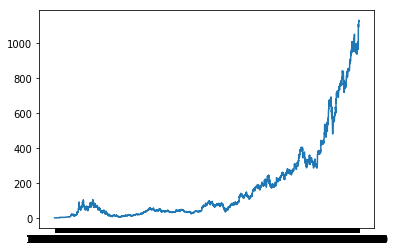

In [11]:
plt.plot(amzn_df['Date'], amzn_df['Close'])
plt.show()

In [12]:
alltickers_df = pd.concat(tickerdflist, ignore_index=True)
alltickers_df.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
52687,2017-11-06,90.90,93.75,90.51,92.35,984511,0,yy
52688,2017-11-07,92.97,94.27,91.06,91.36,636653,0,yy
52689,2017-11-08,91.10,91.76,87.73,89.40,1116162,0,yy
52690,2017-11-09,88.72,91.09,88.39,90.65,821527,0,yy
52691,2017-11-10,89.77,90.40,88.08,88.92,550619,0,yy


In [14]:
# Calculate the Percent Change of Close price (change from prior close) and back fill NaNs
amzn_df['pct_change'] = amzn_df['Close'].pct_change()
amzn_df['pct_change'] = amzn_df['pct_change'].bfill()
# Calculate the Log Return of Close Price (from prior close) and back fill NaNs
amzn_df['log_ret'] = np.log(amzn_df['Close'] / amzn_df['Close'].shift(1))
amzn_df['log_ret'] = amzn_df['log_ret'].bfill()
amzn_df.head(5)

,Date,Close,Volume,ticker,pct_change,log_ret
0,1997-05-16,1.73,14700000,amzn,-0.011561,-0.011628
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628
2,1997-05-20,1.64,5467200,amzn,-0.040936,-0.041797
3,1997-05-21,1.43,18853200,amzn,-0.128049,-0.137022
4,1997-05-22,1.40,11776800,amzn,-0.020979,-0.021202


In [15]:
amzn_df['log_ret'].max()


0.2961810955094115

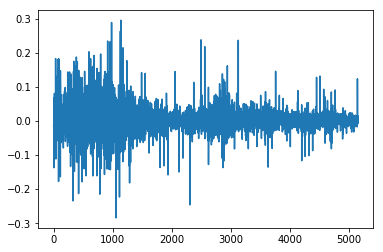

In [16]:
plt.plot(amzn_df['log_ret'])

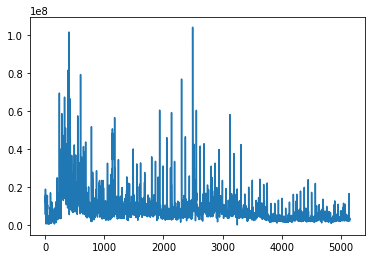

In [17]:
plt.plot(amzn_df['Volume'])

In [18]:
# Create Inputs (Feature/Independent Variables).  The model will calculate the Weights (Coefficients)
# use .bfill() to back fill the NaNs due to shifting the data with the last available value
tminus1 = amzn_df['log_ret'].shift(1)
tminus1 = tminus1.bfill()
tminus2 = amzn_df['log_ret'].shift(2)
tminus2 = tminus2.bfill()
tminus3 = amzn_df['log_ret'].shift(3)
tminus3 = tminus3.bfill()

In [19]:
# Add inputs back to dataframe
amzn_df['t1'] = tminus1
amzn_df['t2'] = tminus2
amzn_df['t3'] = tminus3
amzn_df.head(5)

,Date,Close,Volume,ticker,pct_change,log_ret,t1,t2,t3
0,1997-05-16,1.73,14700000,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628
2,1997-05-20,1.64,5467200,amzn,-0.040936,-0.041797,-0.011628,-0.011628,-0.011628
3,1997-05-21,1.43,18853200,amzn,-0.128049,-0.137022,-0.041797,-0.011628,-0.011628
4,1997-05-22,1.40,11776800,amzn,-0.020979,-0.021202,-0.137022,-0.041797,-0.011628


In [20]:
# Drop columns not used for particular model
amzn_df2 = amzn_df.drop(['Date', 'Close', 'Volume', 'ticker', 'pct_change'], 1)
amzn_df2.head()

,log_ret,t1,t2,t3
0,-0.011628,-0.011628,-0.011628,-0.011628
1,-0.011628,-0.011628,-0.011628,-0.011628
2,-0.041797,-0.011628,-0.011628,-0.011628
3,-0.137022,-0.041797,-0.011628,-0.011628
4,-0.021202,-0.137022,-0.041797,-0.011628


In [21]:
# Convert dataframe into numpy array for input into model
np_array_data = amzn_df2.values
# n = amzn_df2.shape[0]
# p = amzn_df2.shape[1]
# Get dimensions of data
n = np_array_data.shape[0]
p = np_array_data.shape[1]
print(n, p)

5153 4


In [22]:
# Divide up data into Training and Testing subsets
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = np_array_data[np.arange(train_start, train_end), :]
data_test = np_array_data[np.arange(test_start, test_end), :]

In [23]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

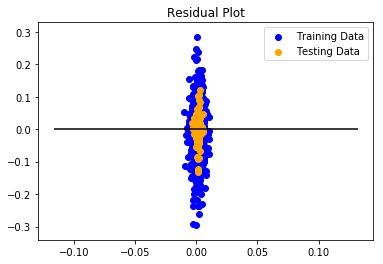

In [24]:
# Apply data to Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Plot Residuals of predictions
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [25]:
# Evaluate model
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.000351932739614988, R2: -0.001682640908384547


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
amzn_df.head(2)

,Date,Close,Volume,ticker,pct_change,log_ret,t1,t2,t3
0,1997-05-16,1.73,14700000,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628


In [28]:
testseries = amzn_df['pct_change']
testseries.tail(5)

5148    0.008150
5149    0.002240
5150    0.008645
5151   -0.003310
5152   -0.003348
Name: pct_change, dtype: float64

In [29]:
testseries = testseries.where(testseries <0, 1)
testseries = testseries.where(testseries >0, 0)
testseries.tail(5)

5148    1.0
5149    1.0
5150    1.0
5151    0.0
5152    0.0
Name: pct_change, dtype: float64

In [30]:
amzn_df['chg_from_prev'] = testseries
amzn_df.tail(5)

,Date,Close,Volume,ticker,pct_change,log_ret,t1,t2,t3,chg_from_prev
5148,2017-11-06,1120.66,3331738,amzn,0.008150,0.008117,0.015759,-0.008608,-0.001449,1.0
5149,2017-11-07,1123.17,2684443,amzn,0.002240,0.002237,0.008117,0.015759,-0.008608,1.0
5150,2017-11-08,1132.88,2576010,amzn,0.008645,0.008608,0.002237,0.008117,0.015759,1.0
5151,2017-11-09,1129.13,3729978,amzn,-0.003310,-0.003316,0.008608,0.002237,0.008117,0.0
5152,2017-11-10,1125.35,2179181,amzn,-0.003348,-0.003353,-0.003316,0.008608,0.002237,0.0


In [31]:
amzn_df3 = amzn_df[['chg_from_prev', 't1', 't2', 't3']]
amzn_df3.head()

,chg_from_prev,t1,t2,t3
0,0.0,-0.011628,-0.011628,-0.011628
1,0.0,-0.011628,-0.011628,-0.011628
2,0.0,-0.011628,-0.011628,-0.011628
3,0.0,-0.041797,-0.011628,-0.011628
4,0.0,-0.137022,-0.041797,-0.011628


In [32]:
np_array_data2 = amzn_df3.values
# n = amzn_df2.shape[0]
# p = amzn_df2.shape[1]
# Get dimensions of data
n = np_array_data2.shape[0]
p = np_array_data2.shape[1]
print(n, p)

5153 4


In [33]:
# Divide up data into Training and Testing subsets
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = np_array_data2[np.arange(train_start, train_end), :]
data_test = np_array_data2[np.arange(test_start, test_end), :]
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [34]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.509946627850558
Testing Data Score: 0.5213592233009708


In [35]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(10)

,Actual,Prediction
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,0.0
6,0.0,0.0
7,1.0,0.0
8,0.0,0.0
9,1.0,0.0
